### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading Data from csv 

In [2]:
df = pd.read_csv("housePrice.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_U
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
5,70,2,True,True,False,North Program Organization,2050000000,68333.33
6,87,2,True,True,True,Pardis,600000000,20000.00
7,59,1,True,True,True,Shahran,2150000000,71666.67
8,54,2,True,True,False,Andisheh,493000000,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2370000000,79000.00


In [3]:
#describing the data 
df.describe()

,Room,Price,Price_U
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


### Missing Values

In [4]:
#Null Values
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
Price_U       0
dtype: int64

In [5]:
#NA Values
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
Price_U       0
dtype: int64

### Improving the Data

In [6]:
from scipy import stats

#Converting Area to Numeric Values
df.Area = pd.to_numeric(df.Area, errors='coerce')

#Drop NA and NUll Values for 'Address' and 'Area'
df = df.dropna(subset=['Area', 'Address'])

#removing the Outliers from 'Area'
df = df[(np.abs(stats.zscore(df['Area'])) < 3)]

#converting bool to int
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

#converting address to int
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Address_'] = LE.fit_transform(df['Address'])

df.head(10)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_U,Address_
0,63.0,1,1,1,1,Shahran,1850000000,61666.67,154
1,60.0,1,1,1,1,Shahran,1850000000,61666.67,154
2,79.0,2,1,1,1,Pardis,550000000,18333.33,115
3,95.0,2,1,1,1,Shahrake Qods,902500000,30083.33,150
4,123.0,2,1,1,1,Shahrake Gharb,7000000000,233333.33,148
5,70.0,2,1,1,0,North Program Organization,2050000000,68333.33,104
6,87.0,2,1,1,1,Pardis,600000000,20000.00,115
7,59.0,1,1,1,1,Shahran,2150000000,71666.67,154
8,54.0,2,1,1,0,Andisheh,493000000,16433.33,12
9,71.0,1,1,1,1,West Ferdows Boulevard,2370000000,79000.00,180


In [7]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price_U,Address_
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3.395000e+03,3.395000e+03,3395.000000
mean,100.764065,2.054786,0.846244,0.916053,0.793225,4.908481e+09,1.636160e+05,103.675405
std,46.216236,0.720483,0.360767,0.277349,0.405052,6.302030e+09,2.100677e+05,49.597978
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02,0.000000
25%,68.000000,2.000000,1.000000,1.000000,1.000000,1.395000e+09,4.650000e+04,60.000000
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.800000e+09,9.333333e+04,115.000000
75%,120.000000,2.000000,1.000000,1.000000,1.000000,5.850000e+09,1.950000e+05,144.000000
max,312.000000,5.000000,1.000000,1.000000,1.000000,7.440000e+10,2.480000e+06,188.000000


### Visualization

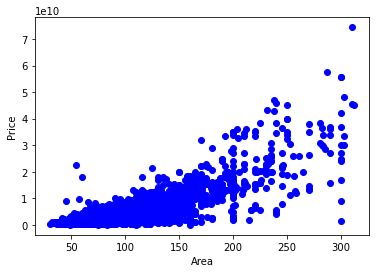

In [8]:
plt.scatter(df.Area, df.Price, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

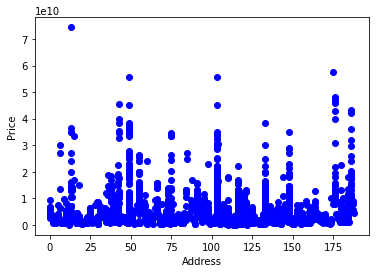

In [9]:
plt.scatter(df.Address_, df.Price, color='blue')
plt.xlabel('Address')
plt.ylabel('Price')
plt.show()

### Spliting train and test data

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

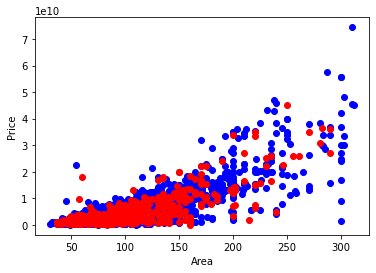

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train.Area, train.Price,  color='blue')
ax1.scatter(test.Area, test.Price,  color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### Simple Linear Regression with Area-Price

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

regr.fit(train_x, train_y)

print(f'Coefficients: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficients: [[1.114749e+08]]
Intercept: [-6.3173585e+09]


Text(0, 0.5, 'House Price')

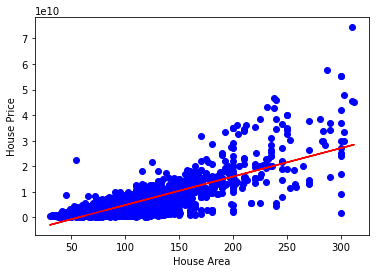

In [13]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("House Area")
plt.ylabel("House Price")

### Evaluation of the Model

In [14]:
test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])

print(f'Variance score: {regr.score(test_x, test_y)}')

Variance score: 0.6058753069190568


---
### Mulitple Linear Regression

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Area', 'Room', 'Parking','Warehouse', 'Elevator', 'Address_']])
train_y = np.asanyarray(train[['Price']])

regr.fit(train_x, train_y)

print (f'Coefficients: {regr.coef_}')
print (f'Intercept: { regr.intercept_}')

Coefficients: [[ 1.32565872e+08 -1.83219727e+09  3.64988840e+08  3.33933747e+08
   1.58239178e+08  6.70148732e+05]]
Intercept: [-5.46517552e+09]


### Evaluation of Multiple Lieaner Model

In [16]:
test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address_']])
test_y = np.asanyarray(test[['Price']])

print(f'Variance score: {regr.score(test_x, test_y)}')

Variance score: 0.6208172838120207


---
### Polynominal Regression with Area

In [17]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 6.0000e+01, 3.6000e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       ...,
       [1.0000e+00, 8.3000e+01, 6.8890e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [18]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print(f'Coefficients: {clf.coef_}')
print(f'Intercept: {clf.intercept_}')

Coefficients: [[       0.         -5824247.27178403   424185.35855449]]
Intercept: [2.9924852e+08]


Text(0, 0.5, 'House Price')

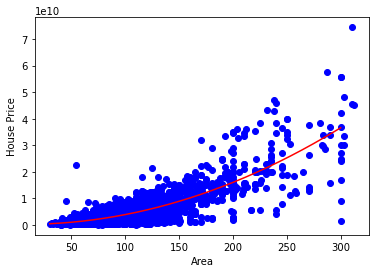

In [19]:
plt.scatter(train.Area, train.Price, color='blue')
xx = np.arange(30, 300, 0.5)
yy = ((clf.intercept_[0]) + (clf.coef_[0][1] * xx) + (clf.coef_[0][2] * np.power(xx, 2)))
plt.plot(xx, yy, '-r' )
plt.xlabel('Area')
plt.ylabel('House Price')

### Evaluation of the Polynominal Regression with Area

In [20]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y = np.asanyarray(test[['Price']])
test_x = np.asanyarray(test[['Area']])
test_y_ = clf.predict(test_x_poly)

print(f'R2-score: {r2_score(test_y,test_y_ )})')

R2-score: 0.6765383193466243)
